임의가진에 대한 1자유도(SDOF) 시스템의 과도응답을 수치적으로 계산하는 방법들에 대해 알아보자.

SDOF 시스템의 지배방정식은 다음과 같다.

$m\ddot{x}(t) + c \dot{x}(t) + kx(t) = F(t)\tag{1}$

식 (1)을 수치적으로 푸는 방법들을 알아보고, 방법들의 정확도를 비교해보도록 하자.

## 1. piecewise exact method (piecewise linear method)

아래 그림1과 같은 하중이 가해진다고 생각해 보자. 파랑선은 실제 하중이고, 빨간선은 수치계산을 위해 임의의 시간간격으로 하중 값을 추출한 것이다.
piecewise exact method는 추출한 하중점 사이를 선형(linear)이라 가정한다. 그리고 각 시간간격에서 사다리꼴 형태의 하중이 가해졌을 때(식(2))의 exact solution (식(3))을 적용한다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(0,5,1000);
plt.plot(t,np.sin(t),'b-'); plt.ylim([-1.2,1.2])
plt.title('Figure 1. Transient Force');
t1 = np.linspace(0,5,6);
plt.plot(t1,np.sin(t1),'r.-');
plt.grid();

$$F(\tau) = F_0 + \alpha \tau, \;\; (0 \leq \tau \leq h) \tag{2}$$

where,

$h$ : 고려하는 시간 간격

$\alpha = \frac{F(h)-F(0)}{h}$

$$x(t) = e^{-\zeta \omega_n t} \{A sin(\omega_d t) + B cos(\omega_d t)\} + (\alpha k t + k F_0 - \alpha c)/k^2 \tag{3}$$

where,

$\zeta$ : damping ratio

$\omega_n$ : natural frequency

$\omega_d = \omega_n \sqrt{1-\zeta^2}$ : damped natural frequency

$k$ : stiffness coefficient

$c$ : damping coefficient

$\alpha = \frac{F(t_2) - F(t_1)}{\Delta t}$

식(3)에 계수 $A, B$는 초기조건을 통해 계산할 수 있으며 다음과 같다.

$$A = \left(\dot{x}_0+\zeta \omega_n B - \frac{\delta(\Delta_{st})}{h} \right)\frac{1}{\omega_d}$$

$$ B = x_0 + \frac{2\zeta}{\omega}\frac{\delta(\Delta_{st})}{h} - \Delta_{st}$$

where,

$\Delta_{st} = \frac{F(0)}{k}$

$\delta(\Delta_{st}) = \frac{F(h)-F(0)}{k}$

식(3)에 $t = h$를 대입하면 최종적으로 다음 식을 얻는다.

$$x(h) = A S_{\zeta,h} + B C_{\zeta, h} + (\Delta_{st} + \delta (\Delta_{st})) - \frac{2\zeta}{\omega_n} \frac{\delta (\Delta_{st})}{h}$$

$$\dot{x}(h) = A(\omega_d C_{\zeta,h} - \zeta \omega_n S_{\zeta,h}) - B (\zeta \omega_n C_{\zeta,h} + \omega_d S_{\zeta, h}) + \frac{\delta (\Delta_{st})}{h} $$

where,

$S_{\zeta, h} = e^{-\zeta \omega_n h} sin(\omega_d h)$

$C_{\zeta, h} = e^{-\zeta \omega_n h} cos(\omega_d h)$

### 예제 - piece wise exact method 

공진조건에서 SDOF 변위응답은 다음과 같다.

$$x(t) = \Delta_{st}\left( e^{-\zeta \omega_n t}(\frac{sin(\omega_d t)}{2\sqrt{1-\zeta^2}}+\frac{cos(\omega_d t)}{2\zeta}) - \frac{cos(\omega_n t)}{2\zeta} \right)$$

다음과 같은 시스템 변수 및 하중 조건을 고려해보자.

$m = 1000 \;kg$

$k = 4 \pi^2 1000 \;N/m$

$\omega_n = 2\pi$

$\zeta = 0.05$

$F(t) = 4 \pi^2 5 sin(2\pi t)\; N$



In [2]:
def F(t):
    return 4*np.pi*np.pi*5*np.sin(2*np.pi*t);

In [12]:
def x_exact(t,m,k,wn,zeta):
    Dst = F(0)/k; wd = wn*np.sqrt(1-zeta**2);
    return (5/1000)*(np.exp(-zeta*wn*t)*(np.sin(wd*t)/(2*np.sqrt(1-zeta**2)) + np.cos(wd*t)/(2*zeta) ) - np.cos(wn*t)/(2*zeta));

In [13]:
m = 1000; k = 4*np.pi*np.pi*1000; wn = 2*np.pi; zeta = 0.05;

In [14]:
t = np.linspace(0,2,1000);
x1 = x_exact(t,m,k,wn,zeta); 

In [15]:
F(0)/k

0.0

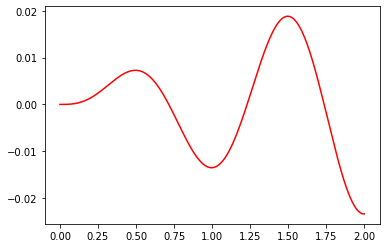

In [16]:
plt.plot(t,x1,'r-',label='Exact');

## 2. central difference method

## 3. integration methods

### 3.1 constant acceleration method

### 3.2 linear acceleration method

### 3.3 Newmark beta method